**Optimized Web Scraping for Medicine Data Extraction from Netmeds**

This project focuses on efficiently scraping data from Netmeds, an online pharmacy, to extract vital information about medicines, including tablet names, prescription requirements, pricing, discounts, and other product details. Initially taking over 15 hours to execute, the project was optimized using multithreading, exception handling, and logging, reducing the execution time to just a few hours. The pipeline was designed to be reusable and scalable, enabling the extraction of data from similar websites. Over 27,000 medicines were successfully scraped, with structured data stored for further analysis on pricing, availability, and discounts.

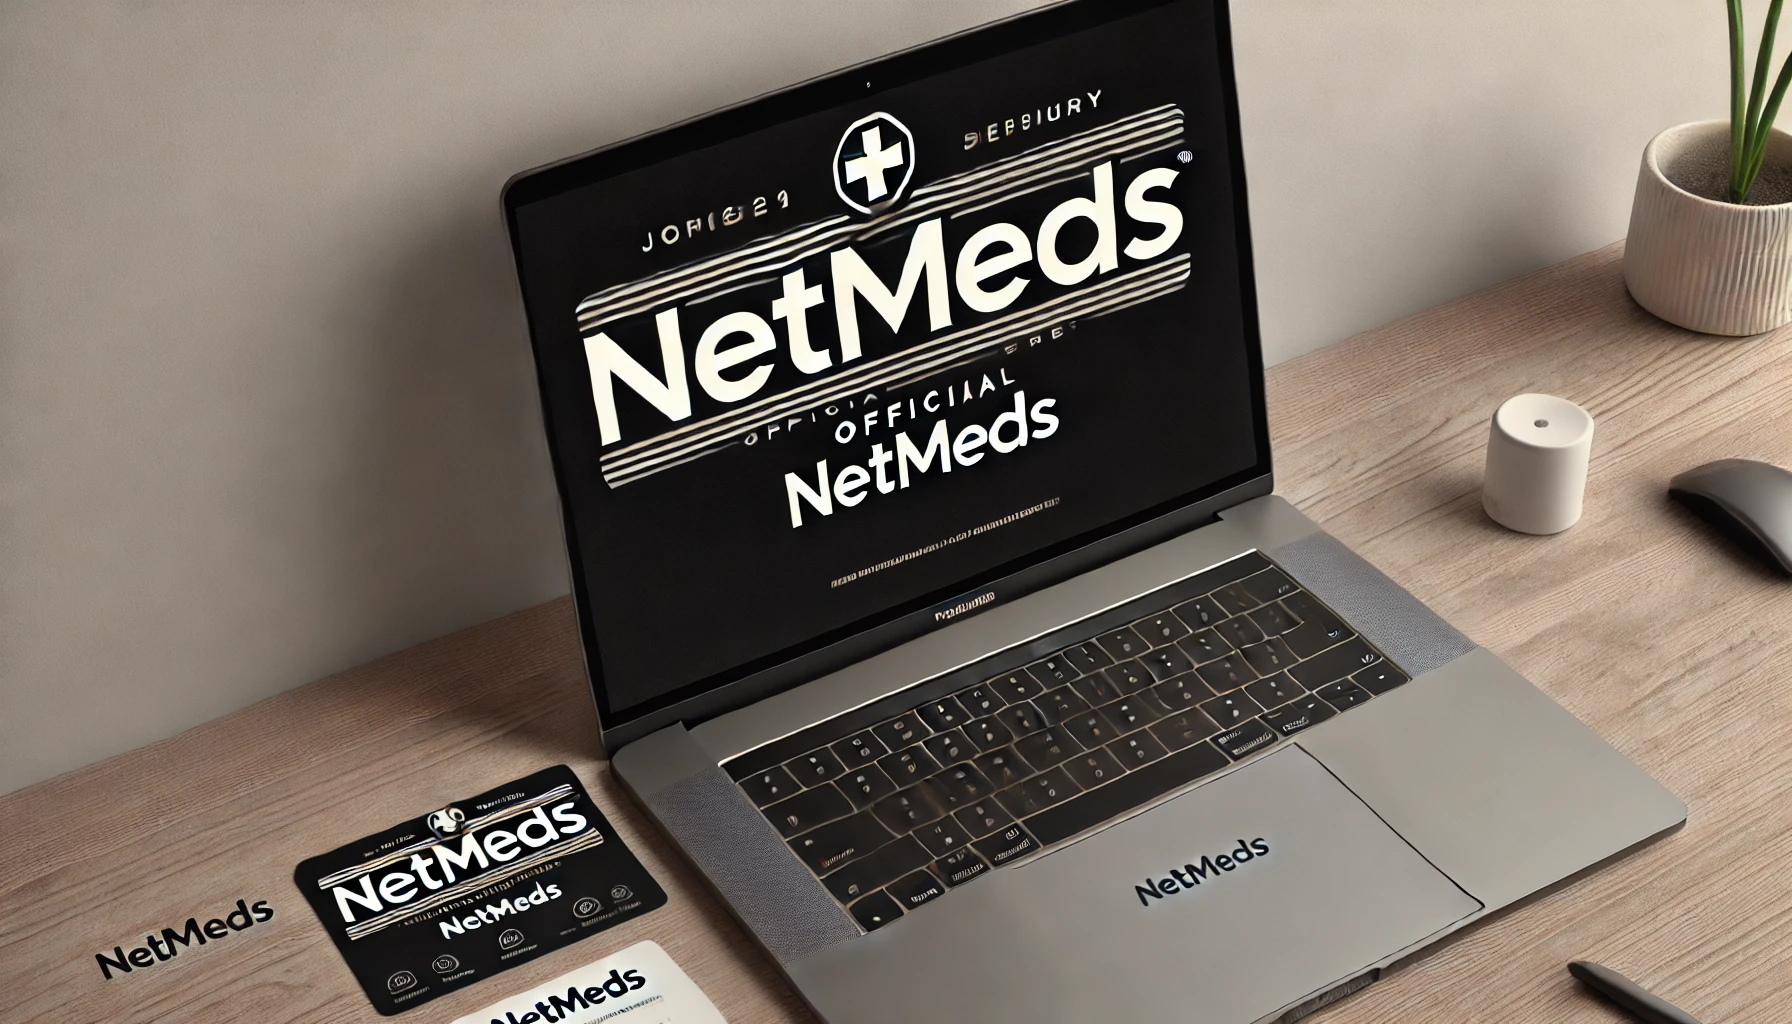

In [ ]:
#importing necessary libraries
import requests
from bs4 import BeautifulSoup
import time
from concurrent.futures import ThreadPoolExecutor, as_completed
import threading
import json
import logging

In [ ]:
url = "https://www.netmeds.com/prescriptions"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# making a list to store links
all_links = []

# Iterate through all divs in the 'prescriptions_products' section
for section in soup.find_all("div", attrs={"class": "prescriptions_products"}): # Iterating through all 'ul' elements with the class 'alpha-drug-list'
    for ul in section.find_all("ul", attrs={"class": "alpha-drug-list"}):
        links = [a['href'] for a in ul.find_all("a", href=True)]  # Extracting all 'a' tags within each 'ul' and get their 'href' attributes
        all_links.extend(links)
# so there are categories like for each disease there is alphabetical drugs for each medicine so we need to go into each disease then each medicine and info related to that drug

In [ ]:
all_links

['https://www.netmeds.com/prescriptions/adhd',
 'https://www.netmeds.com/prescriptions/acne',
 'https://www.netmeds.com/prescriptions/alcohol-addiction',
 'https://www.netmeds.com/prescriptions/allergies',
 'https://www.netmeds.com/prescriptions/alzheimer',
 'https://www.netmeds.com/prescriptions/amoebiasis',
 'https://www.netmeds.com/prescriptions/anaemia',
 'https://www.netmeds.com/prescriptions/anaesthesia-local',
 'https://www.netmeds.com/prescriptions/anaesthesia-general',
 'https://www.netmeds.com/prescriptions/anal-fissure',
 'https://www.netmeds.com/prescriptions/angina',
 'https://www.netmeds.com/prescriptions/anti-allergic',
 'https://www.netmeds.com/prescriptions/anti-scar',
 'https://www.netmeds.com/prescriptions/antibiotic',
 'https://www.netmeds.com/prescriptions/anxiety',
 'https://www.netmeds.com/prescriptions/apnea',
 'https://www.netmeds.com/prescriptions/appetite',
 'https://www.netmeds.com/prescriptions/arrhythmiasis',
 'https://www.netmeds.com/prescriptions/arthrit

In [ ]:
final_link=[]#for storing now each link of specific medicine

In [ ]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"
}
all_med_links = []

for url in all_links:
    print(f"Scraping URL: {url}")
    try:

        response = requests.get(url, headers=headers) # initializing GET request to the current URL
        if response.status_code == 200: # if request succesfully accepted
            soup = BeautifulSoup(response.text, "html.parser")
            med_links = []

            # extracting the main section containing all drugs
            for section in soup.find_all("div", attrs={"class": "prescriptions_products"}):
                for ul in section.find_all("ul"):
                    for li in ul.find_all("li", class_="product-item"):
                        # extracting nested <a> tag and extract the href attribute
                        a_tag = li.find("a", href=True)
                        if a_tag:
                            med_links.append(a_tag["href"])

            # Adding the medication links from this page to the main list
            all_med_links.extend(med_links)
            print(f"Found {len(med_links)} medication links on this page.")

        else:
            print(f"Failed to fetch {url}. Status code: {response.status_code}")

    except Exception as e:
        print(f"An error occurred while scraping {url}: {e}")
    time.sleep(2)    # Adding a delay time  between requests to avoid overwhelming the server


print(f"\nTotal medication links extracted: {len(all_med_links)}")

Scraping URL: https://www.netmeds.com/prescriptions/adhd
Found 12 medication links on this page.
Scraping URL: https://www.netmeds.com/prescriptions/acne
Found 688 medication links on this page.
Scraping URL: https://www.netmeds.com/prescriptions/alcohol-addiction
Found 22 medication links on this page.
Scraping URL: https://www.netmeds.com/prescriptions/allergies
Found 1420 medication links on this page.
Scraping URL: https://www.netmeds.com/prescriptions/alzheimer
Found 172 medication links on this page.
Scraping URL: https://www.netmeds.com/prescriptions/amoebiasis
Found 20 medication links on this page.
Scraping URL: https://www.netmeds.com/prescriptions/anaemia
Found 104 medication links on this page.
Scraping URL: https://www.netmeds.com/prescriptions/anaesthesia-local
Found 110 medication links on this page.
Scraping URL: https://www.netmeds.com/prescriptions/anaesthesia-general
Found 4 medication links on this page.
Scraping URL: https://www.netmeds.com/prescriptions/anal-fissu

In [ ]:
# Saving all the links in the 'all_med_links' list to a text file
with open('all_med_links.txt', 'w') as file:
    for link in all_med_links:
        file.write(link + '\n')

print("Links have been saved to 'all_med_links.txt'")



Links have been saved to 'all_med_links.txt'


In [ ]:
all_med_links

['https://www.netmeds.com/prescriptions/atrest-25mg-tablet-10-s',
 'https://www.netmeds.com/prescriptions/atrest-25mg-tablet-10-s',
 'https://www.netmeds.com/prescriptions/capnea-injection-1ml',
 'https://www.netmeds.com/prescriptions/capnea-solution-1ml',
 'https://www.netmeds.com/prescriptions/cognistar-30mg-injection',
 'https://www.netmeds.com/prescriptions/cognistar-60mg-injection',
 'https://www.netmeds.com/prescriptions/cogniza-tablet-10-s',
 'https://www.netmeds.com/prescriptions/capnea-injection-1ml',
 'https://www.netmeds.com/prescriptions/capnea-solution-1ml',
 'https://www.netmeds.com/prescriptions/cognistar-30mg-injection',
 'https://www.netmeds.com/prescriptions/cognistar-60mg-injection',
 'https://www.netmeds.com/prescriptions/cogniza-tablet-10-s',
 'https://www.netmeds.com/prescriptions/a-ret-0-025-gel-20gm',
 'https://www.netmeds.com/prescriptions/a-ret-0-05-gel-20gm',
 'https://www.netmeds.com/prescriptions/a-ret-0-1-gel-20gm',
 'https://www.netmeds.com/prescriptions/

In [ ]:
valid_links = [link for link in all_med_links if link.startswith("https://")]
print(f"Total valid links: {len(valid_links)}")

# Checking for invalid links by seeing does it starts withh https
invalid_links = [link for link in all_med_links if not link.startswith("https://")]
print(f"Total invalid links: {len(invalid_links)}")
if invalid_links:
    print("Here are some invalid links:")
    print(invalid_links[:10])


Total valid links: 47796
Total invalid links: 0


In [ ]:
# now we have 47796 drugs for each drug we will write a code to extarct the necassary drug info like name,generic,discount
extracted_data_list = []
failed_links = []

# Thread-safe lock
lock = threading.Lock()

#  logging
logging.basicConfig(filename='scraping_log.txt', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Fetching page function with retries
def fetch_page(link, retries=3, delay=5):
    for attempt in range(retries):
        try:
            response = requests.get(link, timeout=10)
            response.raise_for_status()
            return response
        except requests.exceptions.RequestException as e:
            logging.warning(f"Error on {link}: {e} (attempt {attempt+1}/{retries})")
            time.sleep(delay)
    return None

# function for single link
def process_link(link):
    response = fetch_page(link)
    if not response:
        with lock:
            failed_links.append(link)
        return None

    # Parsing and extract data
    soup = BeautifulSoup(response.content, 'html.parser')
    product_name = soup.find('h1', class_='black-txt')
    product_name = product_name.get_text(strip=True) if product_name else "Not Available"

    # Extracting other fields similarly
    disease = soup.find('span', class_='gen_drug')
    disease = disease.get_text(strip=True) if disease else "Not Available"

    rx_required = soup.find('span', class_='req_Rx')
    rx_required = rx_required.get_text(strip=True) if rx_required else "Not Available"

    final_price = soup.find('span', class_='final-price')
    final_price = final_price.get_text(strip=True) if final_price else "Not Available"

    discount = soup.find('span', class_='disc-price')
    discount = discount.get_text(strip=True) if discount else "Not Available"

    country_of_origin = soup.find('span', class_='drug-manu ellipsis origin_text')
    country_of_origin = country_of_origin.get_text(strip=True) if country_of_origin else "Not Available"

    manufacturer = soup.find('span', class_='drug-manu')
    manufacturer = manufacturer.get_text(strip=True) if manufacturer else "Not Available"

    tablet_info = soup.find('div', class_='drug-conf')
    tablet_info = tablet_info.get_text(strip=True) if tablet_info else "Not Available"

    # Creating a dictionary of extracted data and appending
    extracted_data = {
        "Product Name": product_name,
        "Disease": disease,
        "Rx Required": rx_required,
        "Final Price": final_price,
        "Discount": discount,
        "Country of Origin": country_of_origin,
        "Manufacturer": manufacturer,
        "Tablet Info": tablet_info
    }

    # Appending the data to the shared list
    with lock:
        extracted_data_list.append(extracted_data)

    logging.info(f"Extracted data from {link}")

# saving progress if it crashed it would save till recent one
def save_progress():
    with lock:
        with open('extracted_data.json', 'w') as json_file:
            json.dump(extracted_data_list, json_file)
        with open('failed_links.txt', 'w') as file:
            for link in failed_links:
                file.write(f"{link}\n")
    logging.info("Progress saved.")

# Main function to process linkss in parallel
def main(all_med_links):
    batch_size = 100  # Saving progress every 100 links
    with ThreadPoolExecutor(max_workers=30) as executor:
        futures = [executor.submit(process_link, link) for link in all_med_links]

        for i, future in enumerate(as_completed(futures)):
            try:
                future.result()  #  exceptions if any occurred
            except Exception as e:
                logging.error(f"Error in processing: {e}")

            if (i + 1) % batch_size == 0:
                save_progress()
                print(f"Progress saved after {i+1} links.")


    save_progress()


if __name__ == "__main__":
    main(all_med_links)

Progress saved after 100 links.
Progress saved after 200 links.
Progress saved after 300 links.
Progress saved after 400 links.
Progress saved after 500 links.
Progress saved after 600 links.
Progress saved after 700 links.


Progress saved after 800 links.
Progress saved after 900 links.
Progress saved after 1000 links.


Progress saved after 1100 links.


Progress saved after 1200 links.


Progress saved after 1300 links.
Progress saved after 1400 links.


Progress saved after 1500 links.


Progress saved after 1600 links.


Progress saved after 1700 links.


Progress saved after 1800 links.


Progress saved after 1900 links.


Progress saved after 2000 links.


Progress saved after 2100 links.


Progress saved after 2200 links.
Progress saved after 2300 links.
Progress saved after 2400 links.
Progress saved after 2500 links.
Progress saved after 2600 links.
Progress saved after 2700 links.
Progress saved after 2800 links.
Progress saved after 2900 links.
Progress saved after 3000 links.
Progress saved after 3100 links.
Progress saved after 3200 links.
Progress saved after 3300 links.
Progress saved after 3400 links.
Progress saved after 3500 links.
Progress saved after 3600 links.
Progress saved after 3700 links.
Progress saved after 3800 links.
Progress saved after 3900 links.
Progress saved after 4000 links.
Progress saved after 4100 links.
Progress saved after 4200 links.


Progress saved after 4300 links.


Progress saved after 4400 links.


Progress saved after 4500 links.
Progress saved after 4600 links.
Progress saved after 4700 links.
Progress saved after 4800 links.
Progress saved after 4900 links.
Progress saved after 5000 links.
Progress saved after 5100 links.
Progress saved after 5200 links.
Progress saved after 5300 links.
Progress saved after 5400 links.
Progress saved after 5500 links.
Progress saved after 5600 links.
Progress saved after 5700 links.
Progress saved after 5800 links.
Progress saved after 5900 links.
Progress saved after 6000 links.
Progress saved after 6100 links.
Progress saved after 6200 links.
Progress saved after 6300 links.
Progress saved after 6400 links.
Progress saved after 6500 links.
Progress saved after 6600 links.
Progress saved after 6700 links.
Progress saved after 6800 links.
Progress saved after 6900 links.
Progress saved after 7000 links.
Progress saved after 7100 links.
Progress saved after 7200 links.
Progress saved after 7300 links.
Progress saved after 7400 links.
Progress s

Progress saved after 14300 links.


Progress saved after 14400 links.


Progress saved after 14500 links.


Progress saved after 14600 links.
Progress saved after 14700 links.


Progress saved after 14800 links.
Progress saved after 14900 links.


Progress saved after 15000 links.


Progress saved after 15100 links.
Progress saved after 15200 links.


Progress saved after 15300 links.


Progress saved after 15400 links.


Progress saved after 15500 links.


Progress saved after 15600 links.


Progress saved after 15700 links.


Progress saved after 15800 links.


Progress saved after 15900 links.


Progress saved after 16000 links.


Progress saved after 16100 links.
Progress saved after 16200 links.


Progress saved after 16300 links.
Progress saved after 16400 links.
Progress saved after 16500 links.


Progress saved after 16600 links.


Progress saved after 16700 links.
Progress saved after 16800 links.
Progress saved after 16900 links.
Progress saved after 17000 links.
Progress saved after 17100 links.
Progress saved after 17200 links.
Progress saved after 17300 links.
Progress saved after 17400 links.
Progress saved after 17500 links.
Progress saved after 17600 links.
Progress saved after 17700 links.
Progress saved after 17800 links.
Progress saved after 17900 links.
Progress saved after 18000 links.
Progress saved after 18100 links.
Progress saved after 18200 links.
Progress saved after 18300 links.
Progress saved after 18400 links.
Progress saved after 18500 links.
Progress saved after 18600 links.
Progress saved after 18700 links.
Progress saved after 18800 links.
Progress saved after 18900 links.
Progress saved after 19000 links.
Progress saved after 19100 links.
Progress saved after 19200 links.
Progress saved after 19300 links.
Progress saved after 19400 links.
Progress saved after 19500 links.
Progress saved

Progress saved after 21700 links.
Progress saved after 21800 links.


Progress saved after 21900 links.


Progress saved after 22000 links.


Progress saved after 22100 links.


Progress saved after 22200 links.


Progress saved after 22300 links.


Progress saved after 22400 links.


Progress saved after 22500 links.
Progress saved after 22600 links.
Progress saved after 22700 links.


Progress saved after 22800 links.


Progress saved after 22900 links.


Progress saved after 23000 links.


Progress saved after 23100 links.


Progress saved after 23200 links.


Progress saved after 23300 links.


Progress saved after 23400 links.
Progress saved after 23500 links.


Progress saved after 23600 links.


Progress saved after 23700 links.
Progress saved after 23800 links.
Progress saved after 23900 links.
Progress saved after 24000 links.
Progress saved after 24100 links.
Progress saved after 24200 links.
Progress saved after 24300 links.
Progress saved after 24400 links.
Progress saved after 24500 links.
Progress saved after 24600 links.
Progress saved after 24700 links.
Progress saved after 24800 links.
Progress saved after 24900 links.
Progress saved after 25000 links.
Progress saved after 25100 links.


Progress saved after 25200 links.


Progress saved after 25300 links.


Progress saved after 25400 links.
Progress saved after 25500 links.
Progress saved after 25600 links.


Progress saved after 25700 links.
Progress saved after 25800 links.
Progress saved after 25900 links.


Progress saved after 26000 links.


Progress saved after 26100 links.


Progress saved after 26200 links.


Progress saved after 26300 links.


Progress saved after 26400 links.


Progress saved after 26500 links.


Progress saved after 26600 links.


Progress saved after 26700 links.
Progress saved after 26800 links.


Progress saved after 26900 links.


Progress saved after 27000 links.


Progress saved after 27100 links.


Progress saved after 27200 links.
Progress saved after 27300 links.
Progress saved after 27400 links.
Progress saved after 27500 links.
Progress saved after 27600 links.
Progress saved after 27700 links.
Progress saved after 27800 links.
Progress saved after 27900 links.
Progress saved after 28000 links.
Progress saved after 28100 links.
Progress saved after 28200 links.
Progress saved after 28300 links.
Progress saved after 28400 links.
Progress saved after 28500 links.
Progress saved after 28600 links.
Progress saved after 28700 links.
Progress saved after 28800 links.


Progress saved after 28900 links.
Progress saved after 29000 links.
Progress saved after 29100 links.
Progress saved after 29200 links.
Progress saved after 29300 links.
Progress saved after 29400 links.
Progress saved after 29500 links.
Progress saved after 29600 links.


Progress saved after 29700 links.
Progress saved after 29800 links.
Progress saved after 29900 links.
Progress saved after 30000 links.
Progress saved after 30100 links.
Progress saved after 30200 links.
Progress saved after 30300 links.
Progress saved after 30400 links.


Progress saved after 30500 links.
Progress saved after 30600 links.
Progress saved after 30700 links.
Progress saved after 30800 links.
Progress saved after 30900 links.
Progress saved after 31000 links.
Progress saved after 31100 links.
Progress saved after 31200 links.
Progress saved after 31300 links.
Progress saved after 31400 links.
Progress saved after 31500 links.
Progress saved after 31600 links.
Progress saved after 31700 links.
Progress saved after 31800 links.
Progress saved after 31900 links.
Progress saved after 32000 links.
Progress saved after 32100 links.
Progress saved after 32200 links.
Progress saved after 32300 links.
Progress saved after 32400 links.
Progress saved after 32500 links.
Progress saved after 32600 links.
Progress saved after 32700 links.
Progress saved after 32800 links.
Progress saved after 32900 links.
Progress saved after 33000 links.
Progress saved after 33100 links.
Progress saved after 33200 links.
Progress saved after 33300 links.
Progress saved

Progress saved after 41000 links.


Progress saved after 41100 links.
Progress saved after 41200 links.
Progress saved after 41300 links.
Progress saved after 41400 links.
Progress saved after 41500 links.


Progress saved after 41600 links.
Progress saved after 41700 links.
Progress saved after 41800 links.
Progress saved after 41900 links.
Progress saved after 42000 links.
Progress saved after 42100 links.
Progress saved after 42200 links.
Progress saved after 42300 links.
Progress saved after 42400 links.
Progress saved after 42500 links.
Progress saved after 42600 links.
Progress saved after 42700 links.
Progress saved after 42800 links.
Progress saved after 42900 links.
Progress saved after 43000 links.
Progress saved after 43100 links.
Progress saved after 43200 links.
Progress saved after 43300 links.
Progress saved after 43400 links.
Progress saved after 43500 links.
Progress saved after 43600 links.
Progress saved after 43700 links.
Progress saved after 43800 links.
Progress saved after 43900 links.
Progress saved after 44000 links.


Progress saved after 44100 links.


Progress saved after 44200 links.


Progress saved after 44300 links.


Progress saved after 44400 links.
Progress saved after 44500 links.


Progress saved after 44600 links.


Progress saved after 44700 links.


Progress saved after 44800 links.


Progress saved after 44900 links.


Progress saved after 45000 links.


Progress saved after 45100 links.


Progress saved after 45200 links.


Progress saved after 45300 links.


Progress saved after 45400 links.


Progress saved after 45500 links.


Progress saved after 45600 links.


Progress saved after 45700 links.


Progress saved after 45800 links.


Progress saved after 45900 links.


Progress saved after 46000 links.


Progress saved after 46100 links.


Progress saved after 46200 links.
Progress saved after 46300 links.
Progress saved after 46400 links.
Progress saved after 46500 links.
Progress saved after 46600 links.
Progress saved after 46700 links.
Progress saved after 46800 links.
Progress saved after 46900 links.
Progress saved after 47000 links.
Progress saved after 47100 links.
Progress saved after 47200 links.
Progress saved after 47300 links.
Progress saved after 47400 links.
Progress saved after 47500 links.
Progress saved after 47600 links.
Progress saved after 47700 links.
